In [2]:
import pandas as pd
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree,export_graphviz
from sklearn.tree import export_text
import numpy as np

In [3]:
dados = pd.read_csv('CCARDBALANCE.csv', sep =';')

In [4]:
dados['Renda'].astype(str)
print(dados['Renda'][1].replace(',','.'))

106.025


In [5]:
dados.head()

,ID,Renda,Limite,Rating,Cartoes,Idade,Educacao,Sexo,Estudante,Casado,Etnia,Gasto Mensal
0,1,"14,891",3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,"106,025",6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,"104,593",7075,514,4,71,11,Male,No,No,Asian,580
3,4,"148,924",9504,681,3,36,11,Female,No,No,Asian,964
4,5,"55,882",4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [6]:
dados.groupby(dados['Etnia']).count()

,ID,Renda,Limite,Rating,Cartoes,Idade,Educacao,Sexo,Estudante,Casado,Gasto Mensal
Etnia,,,,,,,,,,,
African American,99,99,99,99,99,99,99,99,99,99,99
Asian,102,102,102,102,102,102,102,102,102,102,102
Caucasian,199,199,199,199,199,199,199,199,199,199,199


In [7]:
#Função para classificar quem é Caucasiano 
def Caucasiano(arr):
    if arr == 'Caucasian':
        return 1
    else:
        return 0
    

In [8]:
dados['Caucasiano']=dados['Etnia'].map(Caucasiano)

In [9]:
#Função para classificar quem é Asian
def Asian(arr):
    if arr == 'Asian':
        return 1
    else:
        return 0

In [10]:
dados['Asian']=dados['Etnia'].map(Asian)

In [11]:
#Função para classificar quem usa ou não o cartão
def usa_card(arr):
    if arr == 0:
        return 0
    else:
        return 1
    

In [12]:
#Executando a função para criar um novo array tipo boolean
dados['Usa_card']=dados['Gasto Mensal'].map(usa_card)

In [13]:
#Função para transoformar alguns valores de string para boolean
def string_to_boolean (arr):
    if arr =="Yes":
        return 1
    else: 
        return 0

In [14]:
#Executando a função, criando um novo array tipo boolean
dados['Estudante_boolean']=dados['Estudante'].map(string_to_boolean)

In [15]:
#Executando a função, criando um novo array tipo boolean
dados['Casado_boolean']=dados['Casado'].map(string_to_boolean)

In [16]:
def sexo_to_boolean (arr):
    if arr =="Male":
        return 1
    else: 
        return 0

In [17]:
dados['Sexo_boolean']=dados['Sexo'].map(sexo_to_boolean)

In [32]:
dados['Limite']=dados['Limite'].astype(float)
dados['Rating']=dados['Rating'].astype(float)
dados['Cartoes']=dados['Cartoes'].astype(int)
dados['Idade']=dados['Idade'].astype(int)

In [21]:
#Troca ',' por '.' e converte em float
for i in range (0, len(dados['Renda'])):
    dados['Renda'].astype(str)
    dados['Renda'][i]=dados['Renda'][i].replace(',','.')
dados['Renda'].astype(float)

C:\Users\mathe\AppData\Local\Temp\ipykernel_14396\3048803294.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados['Renda'][i]=dados['Renda'][i].replace(',','.')


0       14.891
1      106.025
2      104.593
3      148.924
4       55.882
        ...   
395     12.096
396     13.364
397     57.872
398     37.728
399     18.701
Name: Renda, Length: 400, dtype: float64

In [22]:
#Declarando as variáveis preditoras
Variaveis =['Renda','Limite', 'Rating', 'Cartoes', 'Idade', 'Educacao', 'Sexo_boolean', 'Estudante_boolean', 'Casado_boolean', 'Caucasiano', 'Asian']

In [33]:
#Modelo: 
modelo_perfil = tree.DecisionTreeClassifier(criterion ='gini')
modelo_perfil.fit(dados[Variaveis], dados['Usa_card'])
print("Número de Folhas: ", modelo_perfil.get_n_leaves())
print("Profundidade: ",modelo_perfil.get_depth())

Número de Folhas:  14
Profundidade:  6


KeyError: 2

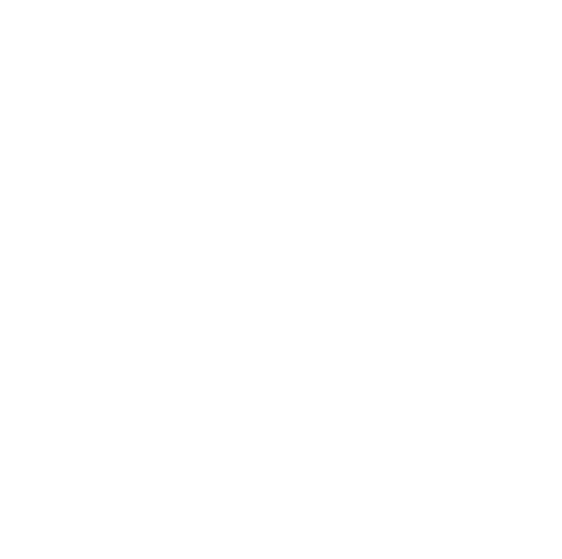

In [31]:
#Tentativa 1 de plotar a árvore
#Fail
plt.figure( figsize=(7,7),dpi=100)
plot_tree(modelo_perfil,feature_names=dados[Variaveis],  
                      class_names=dados['Usa_card'],  
                      filled=True, rounded=True,fontsize=5.0
                    )
plt.show()

In [30]:
?plot_tree

Signature:
plot_tree(
    decision_tree,
    *,
    max_depth=None,
    feature_names=None,
    class_names=None,
    label='all',
    filled=False,
    impurity=True,
    node_ids=False,
    proportion=False,
    rounded=False,
    precision=3,
    ax=None,
    fontsize=None,
)
Docstring:
Plot a decision tree.

The sample counts that are shown are weighted with any sample_weights that
might be present.

The visualization is fit automatically to the size of the axis.
Use the ``figsize`` or ``dpi`` arguments of ``plt.figure``  to control
the size of the rendering.

Read more in the :ref:`User Guide <tree>`.

.. versionadded:: 0.21

Parameters
----------
decision_tree : decision tree regressor or classifier
    The decision tree to be plotted.

max_depth : int, default=None
    The maximum depth of the representation. If None, the tree is fully
    generated.

feature_names : list of strings, default=None
    Names of each of the features.
    If None, generic names will be used ("X[0]",